# Enhancing SGD with Genetic Algorithm

This assignment aims to explore and apply nature-inspired metaheuristic algorithms to optimize machine learning algorithms, with a specific focus on improving the performance of Stochastic Gradient Descent (SGD). The objective is to address limitations in SGD, such as slow convergence and susceptibility to local minima, by integrating advanced optimization techniques inspired by natural processes.



In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_digits
from custom_sgd_classifier import CustomSGDClassifier
import time

# Loading data

In [2]:
# Load and Preprocess Dataset (Using Digits Dataset as Example)
digits = load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)  # Normalize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize Models
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
ga_sgd = CustomSGDClassifier(n_inputs=X_train.shape[1], n_outputs=len(np.unique(y)))

In [4]:
# Train Standard SGD
sgd.fit(X_train, y_train)

# Train GA-SGD
ga_sgd.fit(X_train, y_train, X_test, y_test, n_epochs=3000, ga_interval=10)

# Evaluate Performance
sgd_preds = sgd.predict(X_test)
ga_sgd_preds = ga_sgd.predict(X_test)

Epoch 1: Average Epoch Loss = 1.961618
Epoch 2: Average Epoch Loss = 1.428342
Epoch 3: Average Epoch Loss = 1.115754
Epoch 4: Average Epoch Loss = 0.922003
Epoch 5: Average Epoch Loss = 0.792585
Epoch 6: Average Epoch Loss = 0.699737
Epoch 7: Average Epoch Loss = 0.630472
Epoch 8: Average Epoch Loss = 0.576734
Epoch 9: Average Epoch Loss = 0.533239
Epoch 10: Average Epoch Loss = 0.497714
Epoch 11: Average Epoch Loss = 0.392915
Epoch 12: Average Epoch Loss = 0.303962
Epoch 13: Average Epoch Loss = 0.256038
Epoch 14: Average Epoch Loss = 0.225590
Epoch 15: Average Epoch Loss = 0.203902
Epoch 16: Average Epoch Loss = 0.187126
Epoch 17: Average Epoch Loss = 0.174066
Epoch 18: Average Epoch Loss = 0.163206
Epoch 19: Average Epoch Loss = 0.153913
Epoch 20: Average Epoch Loss = 0.146369
Epoch 21: Average Epoch Loss = 0.142509
Epoch 22: Average Epoch Loss = 0.138390
Epoch 23: Average Epoch Loss = 0.134457
Epoch 24: Average Epoch Loss = 0.131319
Epoch 25: Average Epoch Loss = 0.127647
Epoch 26:

In [5]:
sgd_acc = accuracy_score(y_test, sgd_preds)
ga_sgd_acc = accuracy_score(y_test, np.argmax(ga_sgd_preds, axis=1))
ga_sgd_preds = np.argmax(ga_sgd_preds, axis=1)

print("\nStandard SGD Accuracy:", sgd_acc)
print("GA-SGD Accuracy:", ga_sgd_acc)
print("\nClassification Report (SGD):\n", classification_report(y_test, sgd_preds))
print("Classification Report (GA-SGD):\n", classification_report(y_test, ga_sgd_preds))



Standard SGD Accuracy: 0.9611111111111111
GA-SGD Accuracy: 0.975

Classification Report (SGD):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       0.82      0.93      0.88        30
           9       0.92      0.90      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Classification Report (GA-SGD):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
  

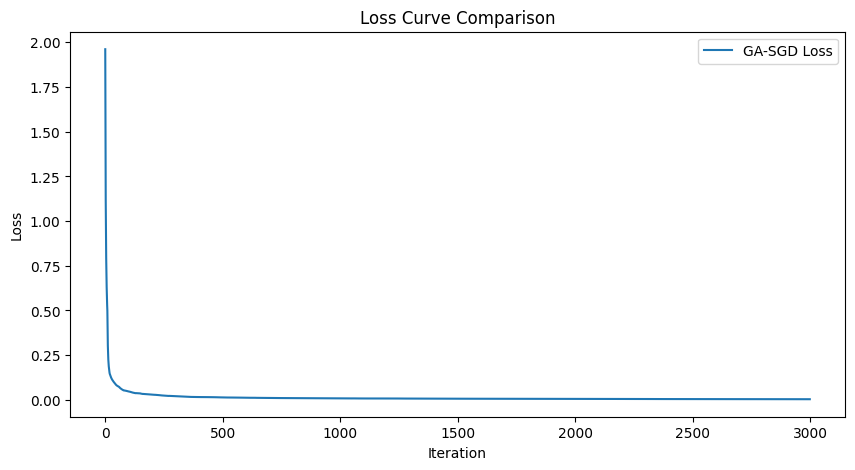

In [6]:
# Plot Loss Curves (Example, assuming your CustomSGDClassifier stores loss history)
plt.figure(figsize=(10,5))
plt.plot(ga_sgd.loss_history, label='GA-SGD Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.show()


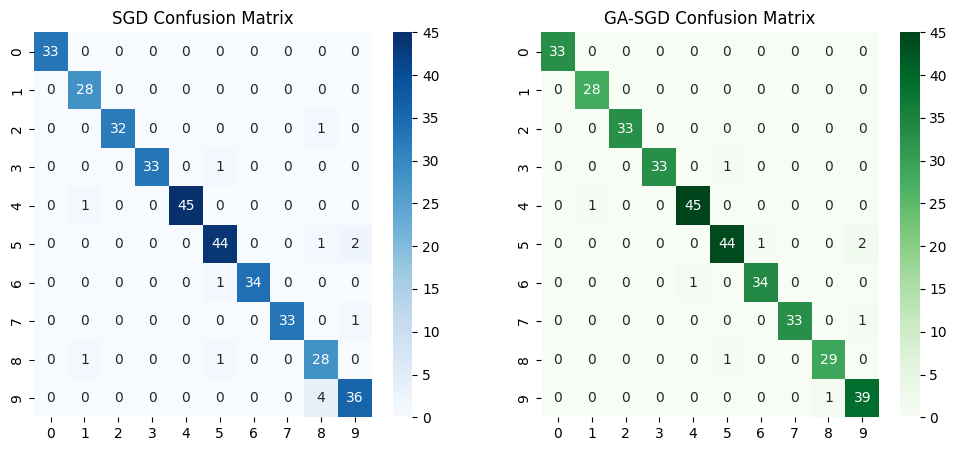

In [9]:

# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_sgd = confusion_matrix(y_test, sgd_preds)
cm_ga_sgd = confusion_matrix(y_test, ga_sgd_preds)
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=axes[0])
sns.heatmap(cm_ga_sgd, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[0].set_title('SGD Confusion Matrix')
axes[1].set_title('GA-SGD Confusion Matrix')
plt.show()

In [23]:
# Stability Analysis (Multiple Runs)
n_runs = 5
sgd_accuracies = []
ga_sgd_accuracies = []

sgd_times = []
ga_sgd_times = []

for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    start_time = time.time()
    sgd.fit(X_train, y_train)
    sgd_times.append(time.time() - start_time)

    sgd_predictions = sgd.predict(X_test)
    if len(sgd_predictions.shape) > 1 and sgd_predictions.shape[1] > 1:  # If it's probability output
        sgd_predictions = np.argmax(sgd_predictions, axis=1)  # Convert to class labels
    sgd_accuracies.append(accuracy_score(y_test, sgd_predictions))

    start_time = time.time()
    ga_sgd.fit(X_train, y_train, X_test, y_test, n_epochs=30, ga_interval=10)
    ga_sgd_times.append(time.time() - start_time)

    ga_sgd_predictions = ga_sgd.predict(X_test)
    if len(ga_sgd_predictions.shape) > 1 and ga_sgd_predictions.shape[1] > 1:  # If it's probability output
        ga_sgd_predictions = np.argmax(ga_sgd_predictions, axis=1)  # Convert to class labels
    ga_sgd_accuracies.append(accuracy_score(y_test, ga_sgd_predictions))


averate_sgd_time = np.mean(sgd_times)
average_ga_sgd_time = np.mean(ga_sgd_times)

mean_sgd_accuracy = np.mean(sgd_accuracies)
mean_ga_sgd_accuracy = np.mean(ga_sgd_accuracies)

Run 1/5
Epoch 1: Average Epoch Loss = 0.003002
Epoch 2: Average Epoch Loss = 0.002994
Epoch 3: Average Epoch Loss = 0.002993
Epoch 4: Average Epoch Loss = 0.002984
Epoch 5: Average Epoch Loss = 0.002985
Epoch 6: Average Epoch Loss = 0.002988
Epoch 7: Average Epoch Loss = 0.002982
Epoch 8: Average Epoch Loss = 0.002992
Epoch 9: Average Epoch Loss = 0.002979
Epoch 10: Average Epoch Loss = 0.002975
Epoch 11: Average Epoch Loss = 0.002980
Epoch 12: Average Epoch Loss = 0.002977
Epoch 13: Average Epoch Loss = 0.002984
Epoch 14: Average Epoch Loss = 0.002981
Epoch 15: Average Epoch Loss = 0.002973
Epoch 16: Average Epoch Loss = 0.002976
Epoch 17: Average Epoch Loss = 0.002976
Epoch 18: Average Epoch Loss = 0.002965
Epoch 19: Average Epoch Loss = 0.002966
Epoch 20: Average Epoch Loss = 0.002963
Epoch 21: Average Epoch Loss = 0.002978
Epoch 22: Average Epoch Loss = 0.002982
Epoch 23: Average Epoch Loss = 0.002973
Epoch 24: Average Epoch Loss = 0.002988
Epoch 25: Average Epoch Loss = 0.002974
E

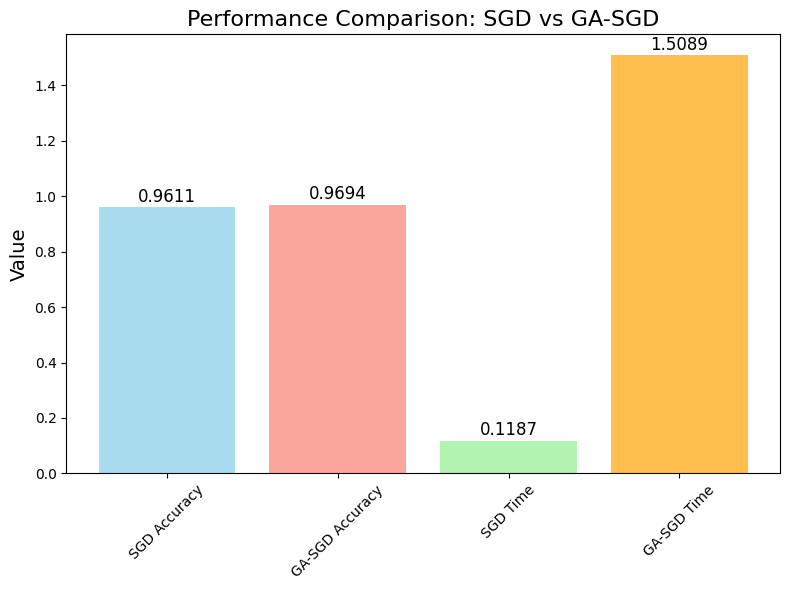

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['SGD Accuracy', 'GA-SGD Accuracy', 'SGD Time', 'GA-SGD Time']
values = [mean_sgd_accuracy, mean_ga_sgd_accuracy, averate_sgd_time, average_ga_sgd_time]
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(metrics, values, color=colors, alpha=0.7)

# Add value labels on top of the bars
for i, v in enumerate(values):
    ax.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

# Titles and labels
ax.set_title("Performance Comparison: SGD vs GA-SGD", fontsize=16)
ax.set_ylabel("Value", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()